In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# reviews shape (568454, 10)
reviews = pd.read_csv('/Users/xueyizhu/Desktop/uchicago/third-quarter/Amazon/Reviews.csv')
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
# delete rows that Profile Name is null
reviews = reviews.loc[~reviews['ProfileName'].isnull(), :]
reviews['ProfileName'].isnull().sum()

0

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568438 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568438 non-null  int64 
 1   ProductId               568438 non-null  object
 2   UserId                  568438 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568438 non-null  int64 
 5   HelpfulnessDenominator  568438 non-null  int64 
 6   Score                   568438 non-null  int64 
 7   Time                    568438 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568438 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [6]:
reviews = reviews.loc[~(reviews['HelpfulnessNumerator'] > reviews['HelpfulnessDenominator']),:]

In [7]:
# Delete the reviews that did not get any vote - HelpfulnessDenominator
reviews = reviews.loc[reviews['HelpfulnessDenominator'] != 0, :]

In [8]:
reviews['HelpfulnessNumerator'].describe()

count    298396.000000
mean          3.321951
std          10.288423
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64

In [9]:
reviews['HelpfulOrNot'] = [1 if i > 1 else 0 for i in reviews['HelpfulnessNumerator']]
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulOrNot
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,0


Text(0.5, 1.0, 'Helpfulneess Numerator Distribution')

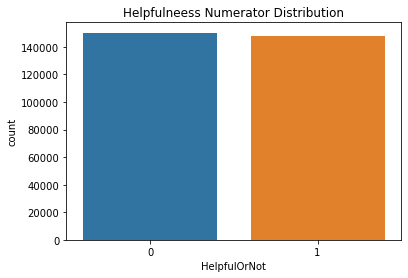

In [10]:
ax = sns.countplot(x = 'HelpfulOrNot', data = reviews, order = reviews['HelpfulOrNot'].value_counts().index)
ax.set_title('Helpfulneess Numerator Distribution')

In [11]:
reviews['HelpfulOrNot'].value_counts(normalize = True)

0    0.503489
1    0.496511
Name: HelpfulOrNot, dtype: float64

Text(0.5, 1.0, 'Score Distribution')

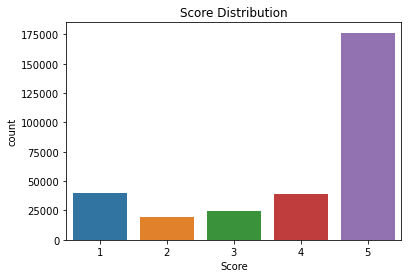

In [12]:
ax = sns.countplot(x = 'Score', data = reviews)
ax.set_title('Score Distribution')

In [13]:
Score_Helpfulness = pd.crosstab(reviews['Score'],reviews['HelpfulOrNot'])
Score_Helpfulness

HelpfulOrNot,0,1
Score,,
1,19347,20653
2,10633,8532
3,13788,10429
4,20985,17653
5,85486,90890


<Figure size 432x288 with 0 Axes>

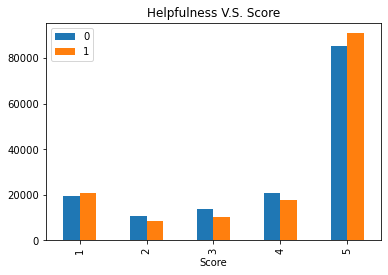

In [14]:
plt.figure()
Score_Helpfulness .plot(kind = 'bar')
plt.legend()
plt.title('Helpfulness V.S. Score')
plt.show()

In [15]:
import re
import string
import nltk
from nltk.corpus import wordnet
# nltk.download('stopwords')
from nltk.corpus import stopwords
# nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
# !pip install unidecode
import unidecode
# !pip install autocorrect
from autocorrect import Speller

In [16]:
#url
def url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

#html
def html(text):
    return re.compile(r'<.*?>').sub(r'',text)

# punctuation
def pun(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

# remove accents
def accents(text):
    return unidecode.unidecode(text)

def clean(text):
    text = str(text).lower()
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[0-9]+','',text)
    return text

# remove extra white spaces between each word
def whitespaces(text):
    return ' '.join(text.split())  

In [17]:
reviews['Text'] = reviews['Text'].apply(lambda x: url(x))
reviews['Text'] = reviews['Text'].apply(lambda x : html(x))
reviews['Text'] = reviews['Text'].apply(lambda x : pun(x))
reviews['Text'] = reviews['Text'].apply(lambda x : accents(x))
reviews['Text'] = reviews['Text'].apply(lambda x: clean(x))
reviews['Text'] = reviews['Text'].apply(lambda x: whitespaces(x))

In [18]:
# stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

# lemmatizer(remove inflectional endings)
lemmatizer = WordNetLemmatizer()
def lemmatization_text(text):
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
    return text

In [19]:
def clean1(text): 
    text = re.sub(r"wont", "will not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"wasnt", "was not", text)
    text = re.sub(r"arent", "are not", text)
    text = re.sub(r"werent", "were not", text)    
    text = re.sub(r"isnt", "is not", text)
    text = re.sub(r"havent", "have not", text)
    text = re.sub(r"hasnt", "has not", text)
    text = re.sub(r"shouldnt", "should not", text)
    text = re.sub(r"wouldnt", "would not", text)
    text = re.sub(r"didnt", "did not", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"aint", "am not", text)
    return text

In [20]:
reviews['Stopwords'] = reviews['Text'].apply(lambda x: remove_stopwords(x))
reviews['Lemmatization'] = reviews['Stopwords'].apply(lambda x: lemmatization_text(x))
reviews['Lemmatization'] = reviews['Lemmatization'].apply(lambda x: clean1(x))

In [21]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulOrNot,Stopwords,Lemmatization
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0,confection around centuries light pillowy citr...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,1,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now im mostly just sprouting this so my ...,0,right im mostly sprouting cats eat grass love ...,right im mostly sprouting cat eat grass love r...
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,i dont know if its the cactus or the tequila o...,0,dont know cactus tequila unique combination in...,do not know cactus tequila unique combination ...


In [64]:
from sklearn.model_selection import train_test_split
x = reviews['Lemmatization']
y = reviews['HelpfulOrNot']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.9, shuffle = True)

In [65]:
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [66]:
# Tokenizing the dataset
tokenize = Tokenizer(num_words = 5000)
tokenize.fit_on_texts(x_train)

x_train_new = tokenize.texts_to_sequences(x_train) 
x_test_new = tokenize.texts_to_sequences(x_test)

In [68]:
len(max(x_train_new, key=len))

1577

In [69]:
# All sequences in a list have the same length
max_review_length = 1577
x_train_new = sequence.pad_sequences(x_train_new, maxlen = max_review_length)
x_test_new = sequence.pad_sequences(x_test_new, maxlen = max_review_length)

In [70]:
x_train_new.shape

(268556, 1577)

#### Model 1:

In [71]:
# Create the model
model = Sequential()
# we define an Embedding layer with a vocabulary of 5000 (e.g. integer encoded words from 0 to 4999, inclusive), 
# a vector space of 32 dimensions in which words will be embedded, and input documents that have 1577 words each.
model.add(Embedding(5000, 32, input_length = 1577))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1577, 32)          160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
model_fit = model.fit(x_train_new, y_train, epochs = 5, 
                   batch_size = 512, verbose = 1, validation_data = (x_test_new, y_test))

Epoch 1/5
525/525 [==============================] - 2936s 6s/step - loss: 0.6736 - accuracy: 0.5754 - val_loss: 0.6523 - val_accuracy: 0.6132
Epoch 2/5
525/525 [==============================] - 3030s 6s/step - loss: 0.6388 - accuracy: 0.6335 - val_loss: 0.6409 - val_accuracy: 0.6277
Epoch 3/5
525/525 [==============================] - 2925s 6s/step - loss: 0.6181 - accuracy: 0.6542 - val_loss: 0.6329 - val_accuracy: 0.6360
Epoch 4/5
525/525 [==============================] - 3224s 6s/step - loss: 0.5961 - accuracy: 0.6718 - val_loss: 0.6251 - val_accuracy: 0.6432
Epoch 5/5
525/525 [==============================] - 3177s 6s/step - loss: 0.5787 - accuracy: 0.6855 - val_loss: 0.6205 - val_accuracy: 0.6509


In [73]:
score = model.evaluate(x_test_new, y_test, batch_size = 512)
score

59/59 [==============================] - 92s 2s/step - loss: 0.6205 - accuracy: 0.6509


[0.6205383539199829, 0.6509048342704773]

In [90]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_test_new).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [91]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

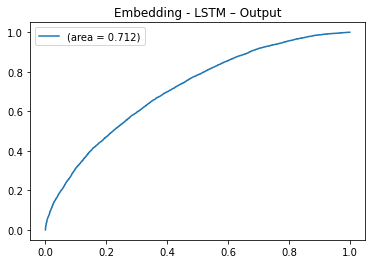

In [108]:
plt.plot(fpr_keras, tpr_keras, label = '(area = {:.3f})'.format(auc_keras))
plt.title('Embedding - LSTM – Output')
plt.legend()

#### Model 2:

In [74]:
model2 = Sequential()
model2.add(Embedding(5000, 32, input_length = 1577))
model2.add(LSTM(100))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1577, 32)          160000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 234,449
Trainable params: 234,449
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
model2_fit = model2.fit(x_train_new, y_train, epochs = 5, 
                   batch_size = 512, verbose = 1, validation_data = (x_test_new, y_test))

Epoch 1/5
525/525 [==============================] - 2933s 6s/step - loss: 0.6740 - accuracy: 0.5754 - val_loss: 0.6486 - val_accuracy: 0.6191
Epoch 2/5
525/525 [==============================] - 2787s 5s/step - loss: 0.6314 - accuracy: 0.6386 - val_loss: 0.6333 - val_accuracy: 0.6325
Epoch 3/5
525/525 [==============================] - 2783s 5s/step - loss: 0.6037 - accuracy: 0.6607 - val_loss: 0.6243 - val_accuracy: 0.6425
Epoch 4/5
525/525 [==============================] - 2974s 6s/step - loss: 0.5786 - accuracy: 0.6771 - val_loss: 0.6180 - val_accuracy: 0.6487
Epoch 5/5
525/525 [==============================] - 2971s 6s/step - loss: 0.5553 - accuracy: 0.6913 - val_loss: 0.6119 - val_accuracy: 0.6565


In [76]:
score2 = model2.evaluate(x_test_new, y_test, batch_size = 512)
score2

59/59 [==============================] - 82s 1s/step - loss: 0.6119 - accuracy: 0.6565


[0.6119268536567688, 0.6565348505973816]

In [96]:
y_pred_keras2 = model2.predict(x_test_new).ravel()
fpr_keras2, tpr_keras2, thresholds_keras2 = roc_curve(y_test, y_pred_keras2)

In [97]:
auc_keras2 = auc(fpr_keras2, tpr_keras2)

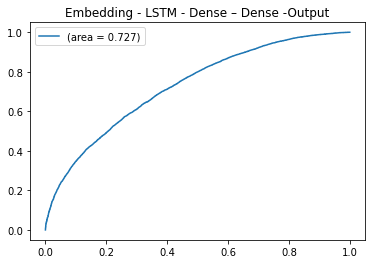

In [109]:
plt.plot(fpr_keras2, tpr_keras2, label = '(area = {:.3f})'.format(auc_keras2))
plt.title('Embedding - LSTM - Dense – Dense -Output')
plt.legend()

#### Model 3:

In [80]:
model3 = Sequential()
model3.add(Embedding(5000, 32, input_length = 1577))
model3.add(LSTM(100, return_sequences = True))
model3.add(LSTM(100))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model3.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1577, 32)          160000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 1577, 100)         53200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
model3_fit = model3.fit(x_train_new, y_train, epochs = 5, 
                   batch_size = 512, verbose = 1, validation_data = (x_test_new, y_test))

Epoch 1/5
525/525 [==============================] - 6037s 11s/step - loss: 0.6739 - accuracy: 0.5740 - val_loss: 0.6530 - val_accuracy: 0.6122
Epoch 2/5
525/525 [==============================] - 6161s 12s/step - loss: 0.6405 - accuracy: 0.6306 - val_loss: 0.6412 - val_accuracy: 0.6256
Epoch 3/5
525/525 [==============================] - 5680s 11s/step - loss: 0.6181 - accuracy: 0.6537 - val_loss: 0.6265 - val_accuracy: 0.6408
Epoch 4/5
525/525 [==============================] - 6002s 11s/step - loss: 0.5938 - accuracy: 0.6742 - val_loss: 0.6156 - val_accuracy: 0.6476
Epoch 5/5
525/525 [==============================] - 8351s 16s/step - loss: 0.5709 - accuracy: 0.6915 - val_loss: 0.6147 - val_accuracy: 0.6555


In [82]:
score3 = model3.evaluate(x_test_new, y_test, batch_size = 512)
score3

59/59 [==============================] - 222s 4s/step - loss: 0.6147 - accuracy: 0.6555


[0.6147013306617737, 0.6555294990539551]

In [101]:
y_pred_keras3 = model3.predict(x_test_new).ravel()
fpr_keras3, tpr_keras3, thresholds_keras3 = roc_curve(y_test, y_pred_keras3)

In [102]:
auc_keras3 = auc(fpr_keras3, tpr_keras3)

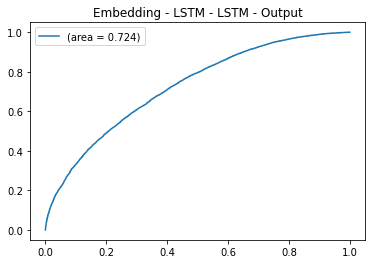

In [110]:
plt.plot(fpr_keras3, tpr_keras3, label = '(area = {:.3f})'.format(auc_keras3))
plt.title('Embedding - LSTM - LSTM - Output')
plt.legend()

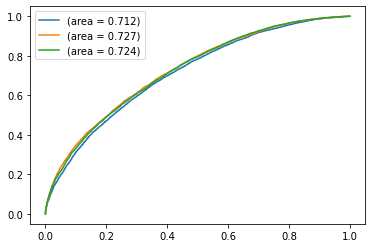

In [112]:
plt.plot(fpr_keras, tpr_keras, label = '(area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label = '(area = {:.3f})'.format(auc_keras2))
plt.plot(fpr_keras3, tpr_keras3, label = '(area = {:.3f})'.format(auc_keras3))
plt.legend()

In [127]:
from sklearn.metrics import roc_auc_score
results_lstm = {'Score': [roc_auc_score(y_test, y_pred_keras), roc_auc_score(y_test, y_pred_keras2), 
                         roc_auc_score(y_test, y_pred_keras3)]}
results_df = pd.DataFrame(results_lstm, index = ['Embedding - LSTM - Output', 
                                                 'Embedding - LSTM - Dense – Dense -Output', 
                                                'Embedding - LSTM - LSTM - Output'])
results_df

,Score
Embedding - LSTM - Output,0.712334
Embedding - LSTM - Dense – Dense -Output,0.726983
Embedding - LSTM - LSTM - Output,0.724314


In [128]:
results_df.reset_index(inplace = True)
results_df = results_df.rename(columns = {'index': 'Model'})
results_df

,Model,Score
0,Embedding - LSTM - Output,0.712334
1,Embedding - LSTM - Dense – Dense -Output,0.726983
2,Embedding - LSTM - LSTM - Output,0.724314


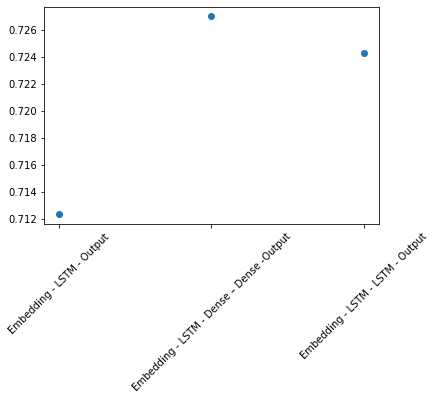

In [130]:
plt.scatter(results_df['Model'], y = results_df['Score'])
plt.xticks(rotation = 45)
plt.show()